In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
from google.colab import drive


#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegressionCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics
drive.mount('/content/drive')
%cd "/content/drive"

Mounted at /content/drive
/content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datasets/2800.HK.csv")
df = pd.DataFrame(data)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
244,2022-10-20,16.90,17.110001,16.670000,16.920000,16.920000,342339454
245,2022-10-21,16.98,17.020000,16.780001,16.870001,16.870001,378234002
246,2022-10-24,16.60,16.650000,15.740000,15.820000,15.820000,317425889
247,2022-10-25,15.90,16.080000,15.590000,15.820000,15.820000,340821044
248,2022-10-26,15.75,16.230000,15.680000,15.970000,15.970000,201901447


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-26,26.879999,26.879999,26.559999,26.680000,26.680000,112252731
1,2021-10-27,26.440001,26.440001,26.219999,26.280001,26.280001,100978240
2,2021-10-28,26.280001,26.400000,26.120001,26.180000,26.180000,133484358
3,2021-10-29,25.639999,25.639999,25.440001,25.520000,25.520000,119120618
4,2021-11-01,25.420000,25.440001,25.100000,25.299999,25.299999,119223633


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,21.859759,22.025502,21.641566,21.843293,21.843293,1.657273e+08
std,2.253511,2.230161,2.268702,2.264812,2.264812,9.661804e+07
min,15.750000,16.080000,15.590000,15.820000,15.820000,0.000000e+00
25%,20.420000,20.580000,20.160000,20.379999,20.379999,1.093391e+08
50%,21.540001,21.820000,21.340000,21.620001,21.620001,1.462175e+08
75%,23.740000,23.959999,23.559999,23.680000,23.680000,1.937022e+08
max,26.879999,26.879999,26.559999,26.680000,26.680000,9.593655e+08


In [ ]:
for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

Date 	-	 0.0
Open 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Close 	-	 0.0
Adj Close 	-	 0.0
Volume 	-	 0.0


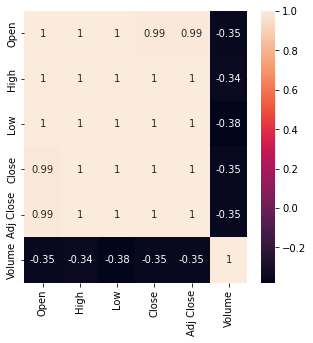

In [ ]:


cormap = df.corr() # correlated values in range -1 to +1
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [ ]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [ ]:
top_corelated_values = get_corelated_col(cormap['Close'], 0.60)
top_corelated_values

,corr value
Open,0.993903
High,0.997841
Low,0.997024
Close,1.000000
Adj Close,1.000000


In [ ]:
df = df[top_corelated_values.index]
df.head()

,Open,High,Low,Close,Adj Close
0,26.879999,26.879999,26.559999,26.680000,26.680000
1,26.440001,26.440001,26.219999,26.280001,26.280001
2,26.280001,26.400000,26.120001,26.180000,26.180000
3,25.639999,25.639999,25.440001,25.520000,25.520000
4,25.420000,25.440001,25.100000,25.299999,25.299999


In [ ]:
df.shape

(249, 5)

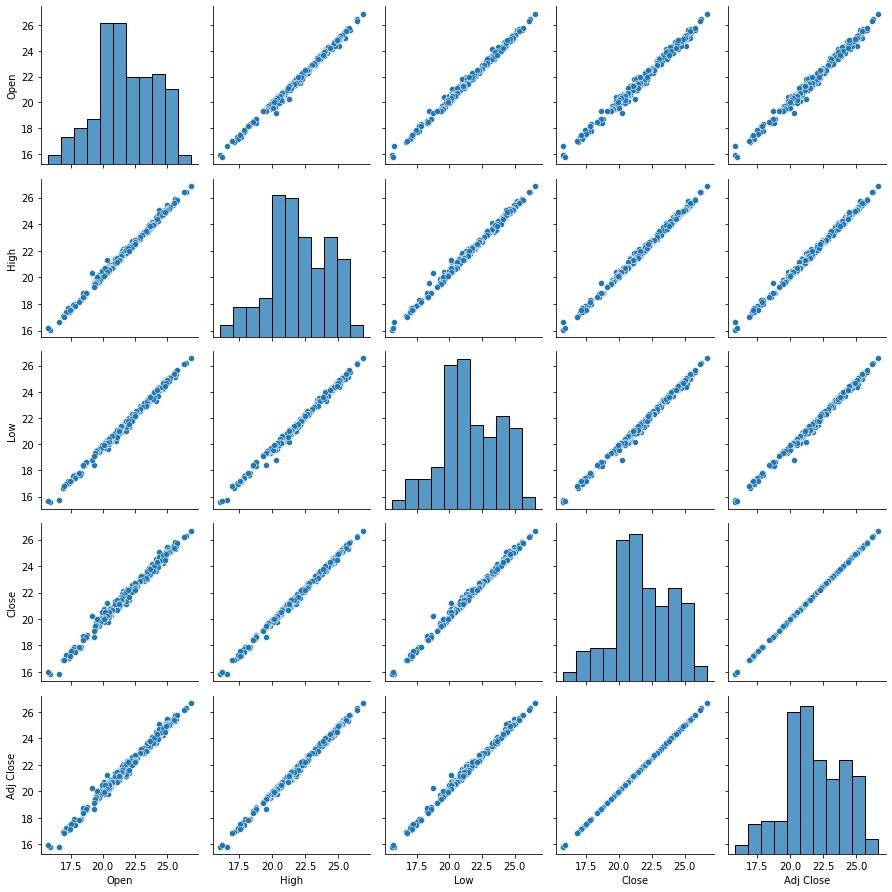

In [ ]:
sns.pairplot(df)
plt.tight_layout()

In [ ]:
X = df.drop(['Close'], axis=1)  
y = df['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Adj Close
0,1.000000,1.000000,1.000000,1.000000
1,0.960467,0.959259,0.969006,0.963168
2,0.946092,0.955556,0.959891,0.953959
3,0.888589,0.885185,0.897904,0.893186
4,0.868823,0.866667,0.866910,0.872928


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc=[]

In [ ]:
#--------------------- LINEAR REGRESSION（invalid） ---------------------
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn import linear_model
model_1 = linear_model.RidgeCV(normalize=True)
# model training
model_1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), normalize=True)

In [ ]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
199,20.340000,20.513613
200,20.420000,20.520155
201,20.280001,20.435116
202,20.320000,20.359107
203,20.280001,20.305898


In [ ]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9838673370509792


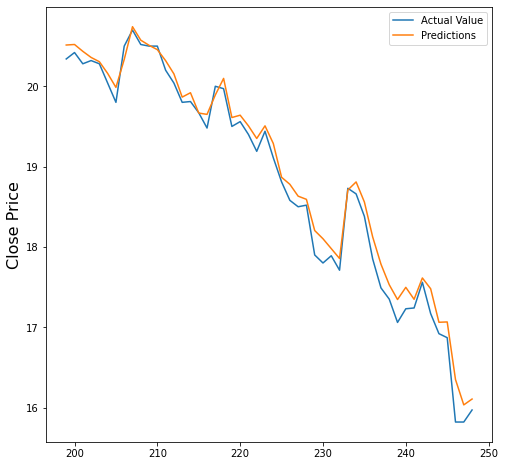

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#---------------- ARTIFICIAL NEURAL NETWORKS (ANN)(invalid) ----------------------
def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model
    model_2 = regressor(inp_dim=3)
    model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def regressor(input):
    
    model = Sequential()
    
    model.add(Dense(25, input_dim=input, kernel_initializer='normal', activation='relu'))
    model.add(Dense(45, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [ ]:
model_2 = regressor(input=4)
model_2.fit(X_train, y_train, epochs=50, validation_split=0.2)
#ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 3), found shape=(None, 4)

Epoch 1/50
5/5 [==============================] - 1s 48ms/step - loss: 528.4929 - val_loss: 455.1778
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 528.1721 - val_loss: 454.8711
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 527.8130 - val_loss: 454.5154
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 527.3865 - val_loss: 454.0876
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 526.8585 - val_loss: 453.5575
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 526.1821 - val_loss: 452.8799
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 525.3066 - val_loss: 451.9927
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 524.1252 - val_loss: 450.8155
Epoch 9/50
5/5 [==============================] - 0s 12ms/step - loss: 522.5373 - val_loss: 449.2394
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 520.3867 - val_loss: 447.12

In [ ]:
y_pred_2 = model_2.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
199,20.340000,17.497042
200,20.420000,17.502844
201,20.280001,17.331675
202,20.320000,17.143522
203,20.280001,17.028067


In [ ]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: -11.550770253672376


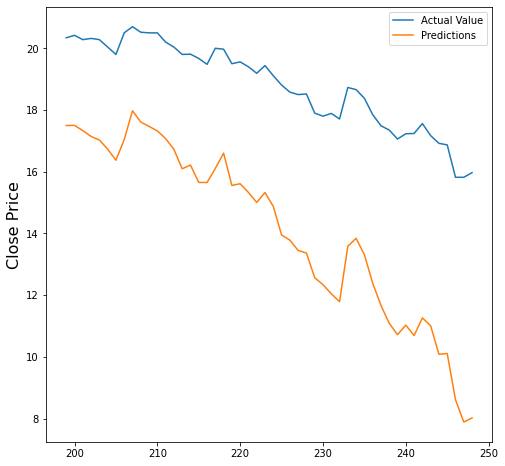

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()


In [ ]:
#---------------------- CONVOLUTION NEURAL NETWORKS (CNN) ---------------------

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1)) #output
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [ ]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 49ms/step - loss: 520.7340 - val_loss: 443.0599
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 504.7133 - val_loss: 428.2646
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 480.9802 - val_loss: 403.8675
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 441.8303 - val_loss: 363.2513
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 377.4070 - val_loss: 297.6110
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 281.3979 - val_loss: 202.9657
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 154.3111 - val_loss: 90.1480
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 39.4364 - val_loss: 8.3637
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 18.5935 - val_loss: 6.9998
Epoch 10/100
5/5 [==============================] - 0s 15ms/step - loss: 36.0277 - val_lo

In [ ]:
# Prediction

y_pred_3 = model_3.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
199,20.340000,20.398380
200,20.420000,20.461800
201,20.280001,20.334116
202,20.320000,20.351738
203,20.280001,20.293242


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9824479525928905


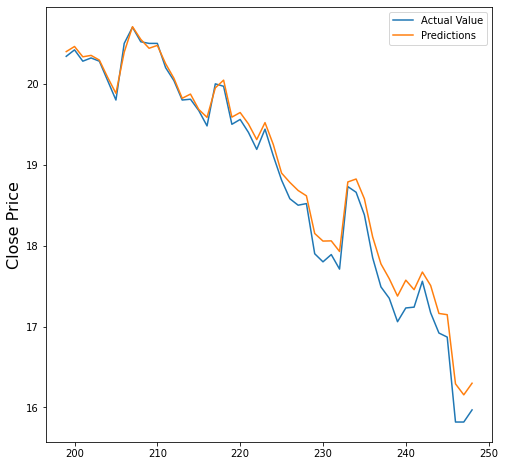

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

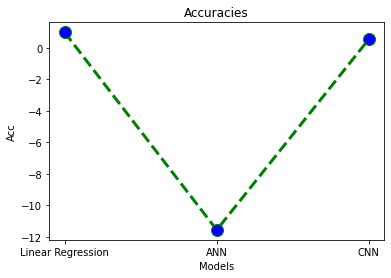

In [ ]:
# ------------------- COMPARING THE 3 MODELS ------------------------

plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()